<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_Joes_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

figure out which features hav ehighest correaltions.  does sklearn have an auto feature function ?  PCA. Could runit on the entire data base and se which n columns it keeps

using date data estimate future sales

I guess dates - months ?  seasons ?  get mixed into the regression.

Maybe make variables out of months , quarters

One cannot pay attn to everything.  There is just too much data. But are there some needles inteh haystack are there are few leaves blowing in the wind that actaully do tell us which way the mkt will go?  And if there are , how can we dientify them?

# Libraries

In [4]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
# !pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics
import calendar
############################
######   pip installs  #####
############################



# Options

In [ ]:
# Get rid of scinetific notation
#pd.set_option('display.float_format', lambda x: '%.16f' % x)

# to revert
#pd.reset_option('display.float_format')

# Data

In [5]:

Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(3) 


,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

# Simple Line Graph of Quatity

In [33]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(3) 

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

In [34]:
LineGraph_data = Porc_Op

In [35]:
LineGraph_data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

In [36]:
#Duplicate the date column
# It gets appended as the last collumn

LineGraph_data['Date_2'] = LineGraph_data.date

In [37]:
LineGraph_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01


In [38]:
# Move the date column back to being the index
LineGraph_data.set_index('date', inplace= True)

In [39]:
# Next convert Date 2 to Date time to strip out Year & Month
#
LineGraph_data['Date_2'] = pd.to_datetime(LineGraph_data['Date_2'])

In [41]:

LineGraph_data['Year'] = LineGraph_data['Date_2'].dt.year

In [42]:
LineGraph_data['Month'] = LineGraph_data['Date_2'].dt.month

In [43]:
# We now have varables Year and Month  to plot 
LineGraph_data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,1
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,2
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,

In [ ]:
#####

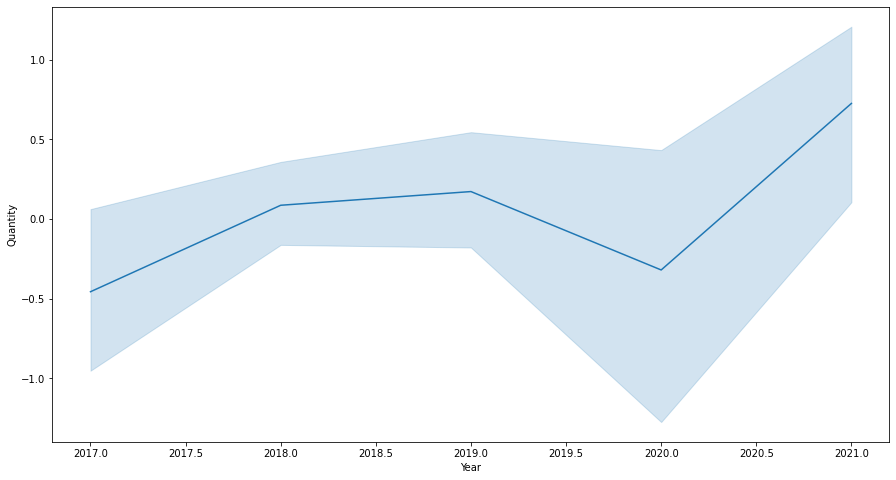

In [46]:
# plot using lineplot
In# [45]: sns.set(style='darkgrid')
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='Quantity', data= LineGraph_data)

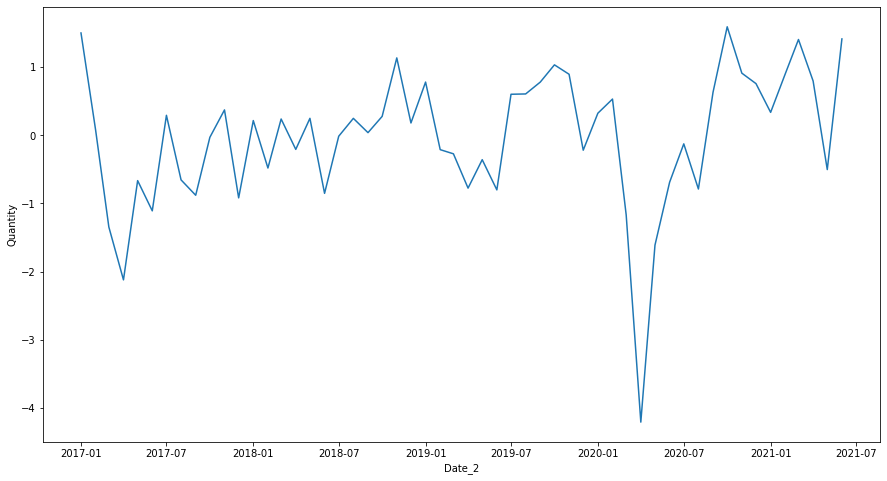

In [47]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Date_2', y='Quantity', data= LineGraph_data)

# "############################################"

# Multi Correlation





# Regression

In [6]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(3) 

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

In [7]:
corr_data = Porc_Op

In [8]:
corr_data['Date_2'] = corr_data.date

In [9]:
# Move the date column back to being the index
corr_data.set_index('date', inplace= True)

In [ ]:
corr_data.head(20)

In [ ]:
corr_data.tail(20)

# DataSplit

In [10]:
corr_data_select = corr_data[['Quantity', 'Gray_cement_dispatch_comercial', 'Gray_cement_dispatch_other','Gray_cement_dispatch','Gray_cement_prod','Housing_total_sales_SI',
               'holiday','Construction_lic_untlag_4' ,'Imports_quantitylag_4','Construction_lic_arealag_4','Construction_lic_area_NO_SIlag_4']]

In [ ]:
corr_data_select.head(1)

In [13]:
feature_cols =  corr_data[['Gray_cement_dispatch_comercial', 'Gray_cement_dispatch_other','Gray_cement_dispatch','Gray_cement_prod','Housing_total_sales_SI',
               'Construction_lic_untlag_4' ,'Imports_quantitylag_4','Construction_lic_arealag_4','Construction_lic_area_NO_SIlag_4','holiday']]


In [ ]:
feature_cols.head(2)

In [ ]:
corr_data_select.head(3)

In [18]:
X = feature_cols
len(X)

54

In [19]:
y = corr_data_select['Quantity']
y
len(y)

54

###Now we have the independent, the X featureas and the y , dependent feature, now weirdly , we feed python 2 dataframes simultaneoulsy, X & y and tell it to place 80% of x in one bin , 20% in test bin, place 80% of y in one bin.....

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [21]:
LinearReg = LinearRegression()  
LinearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

In [23]:
print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: -5.128641121054631
Coefficients: [ 9.24599694e-07  2.92693248e-05  3.86489693e-06 -2.06659778e-06
  8.37626098e-05 -9.13152347e-05 -5.99704007e-06  2.56642934e-06
 -1.29322556e-06 -6.91645279e-02]


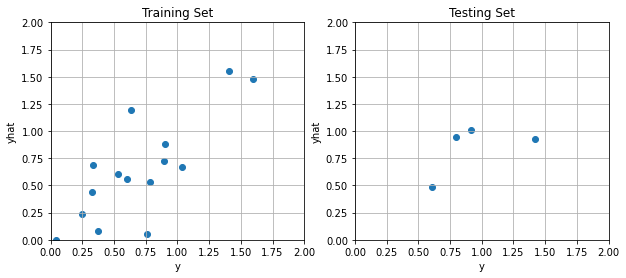

In [24]:
#Two plots togheter

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,2)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')



ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,2)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

########## lone model below

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

In [ ]:
#https://stackoverflow.com/questions/48370562/how-to-add-regression-line-and-regression-line-equation-on-graph

In [ ]:
'''
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=9)

plt.show()
'''

In [ ]:
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Scatter Regression





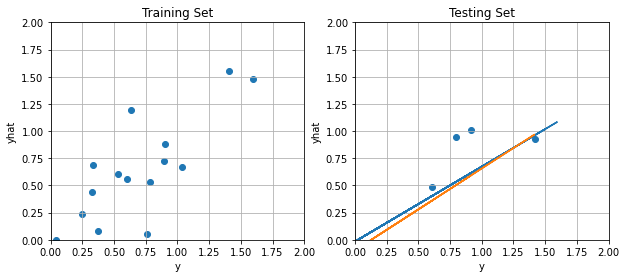

In [65]:
#Added Model Lines

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,2)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')
#
m , b = np.polyfit(y_train ,y_pred_Train,1 )
plt.plot(y_train, m*y_train +b)


ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,2)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
m , b = np.polyfit(y_test ,y_pred_Test,1 )
plt.plot(y_test, m*y_test +b)



In [62]:
ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,2)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()
#m , b = np.polyfit(y_test ,y_pred_Test,1 )
#plt.plot(y_test, m*y_test +b)

Text(0.5, 1.0, 'Training Set')

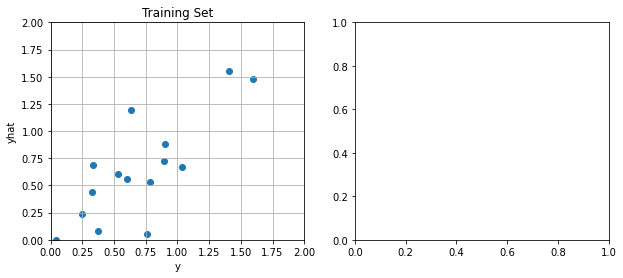

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,2)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')
#


In [25]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.6897254404182074
Mean Absolute Error: 0.41698903043131946
Mean Squared Error: 0.32131769817897904
Root Mean Squared Error: 0.5668489200651079

Testing Metrics:
R squared: 0.48929934546542353
Mean Absolute Error: 0.4702417533600729
Mean Squared Error: 0.42895092680143015
Root Mean Squared Error: 0.6549434531327343


########################################################################

# Boxplots

Put the year over year sbunch together in teh same window for cpmparison.  ame for Month over month


Create new column that is date.  

1. converthe index to a column

2. copy the column (now we have 2 of he same)

3. move one of them back to bein ghte index again.  ( now sure why we need the index to be dates but donet wat to find out either)

In [77]:
Boxplot_data = Porc_Op

In [ ]:
Boxplot_data.head(3)

In [79]:
#Duplicate the date column
# It gets appended as the last collumn

Boxplot_data['Date_2'] = Boxplot_data.date


In [ ]:
Boxplot_data.head(3)

In [81]:
# Move the date column back to being the index
Boxplot_data.set_index('date', inplace= True)

In [ ]:
Boxplot_data.head(3)

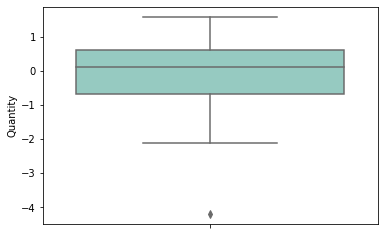

In [83]:
# box plot
ax = sns.boxplot( y="Quantity",
                 data= Boxplot_data, palette="Set3")



Now lets seperate the date to tolot year over year, month over month etc

In [60]:
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])

In [61]:
Boxplot_data['Date_2'].dtypes #<<<--- Stackoverlow assures us this is the same as data type "date"

dtype('<M8[ns]')

In [ ]:
Boxplot_data['Date_2']

In [85]:
# convert the Purchase Date to datetime
#df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
# add a column for Year
#df['Year'] = df['Purchase Date'].dt.year
# convert the Purchase Date to datetime
##################
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])
# add a column for Year
Boxplot_data['Year'] = Boxplot_data['Date_2'].dt.year


In [86]:
Boxplot_data.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.000

In [87]:
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])
# add a column for Year
Boxplot_data['Month'] = Boxplot_data['Date_2'].dt.month

In [88]:
Boxplot_data.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,1
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,2
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,73152

In [90]:
import calendar
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
Boxplot_data['Month'] = Boxplot_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [91]:
Boxplot_data.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,Jan
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,Feb
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7

## Box plot Year Over Year

## Quantity

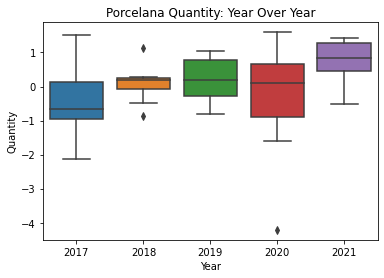

In [94]:
ax = sns.boxplot(x="Year", y="Quantity", data= Boxplot_data).set_title("Porcelana Quantity: Year Over Year")

## Boxplot Month over month

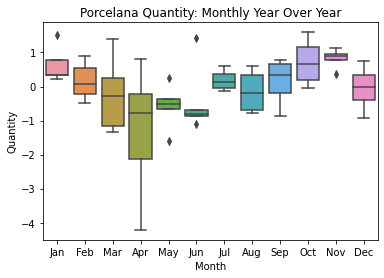

In [95]:
ax = sns.boxplot(x="Month", y="Quantity", data= Boxplot_data).set_title("Porcelana Quantity: Monthly Year Over Year")

In [58]:
# convert the Purchase Date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
# add a column for Year
df['month'] = df['Purchase Date'].dt.month
# print the dataframe
print(df)

  Purchase Date  Sales  Year  month
0    2020-12-29     10  2020     12
1    2020-12-30      8  2020     12
2    2020-12-31     14  2020     12
3    2021-01-01     21  2021      1
4    2021-01-02     16  2021      1
5    2021-01-03     12  2021      1


## Boxplot Gray_cement_dispatch_comercial


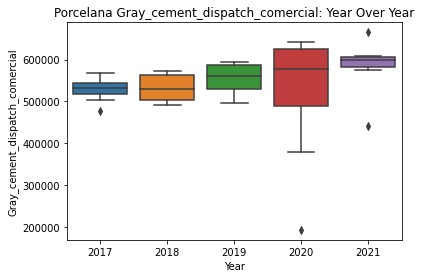

In [103]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_comercial", data= Boxplot_data).set_title("Porcelana Gray_cement_dispatch_comercial: Year Over Year")

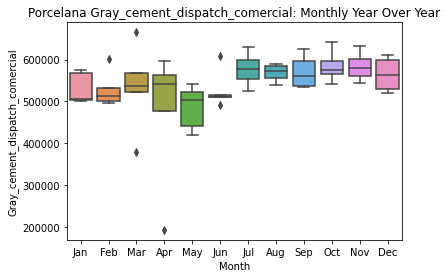

In [102]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_comercial", data= Boxplot_data).set_title("Porcelana Gray_cement_dispatch_comercial: Monthly Year Over Year")

## BoxplotGray_cement_dispatch_other

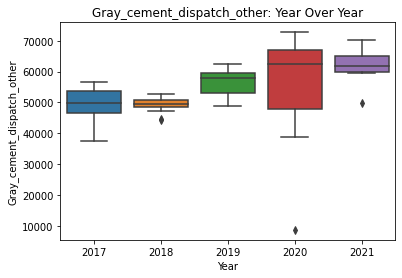

In [104]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_other", data= Boxplot_data).set_title("Gray_cement_dispatch_other: Year Over Year")

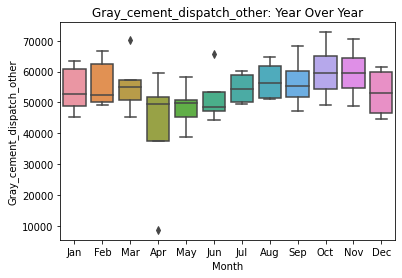

In [105]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_other", data= Boxplot_data).set_title("Gray_cement_dispatch_other: Year Over Year")

# Boxplot Gray_cement_prod 


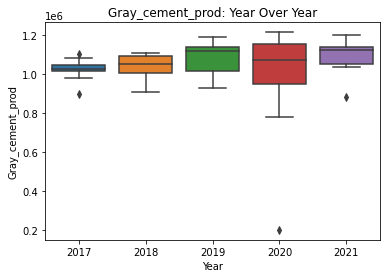

In [106]:
ax = sns.boxplot(x="Year", y="Gray_cement_prod", data= Boxplot_data).set_title("Gray_cement_prod: Year Over Year")

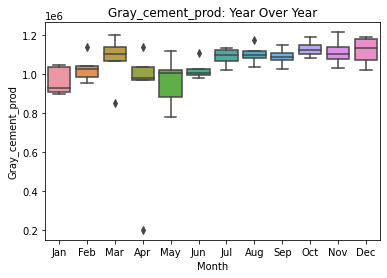

In [107]:
ax = sns.boxplot(x="Month", y="Gray_cement_prod", data= Boxplot_data).set_title("Gray_cement_prod: Year Over Year")

# Boxplot Housing_total_sales 

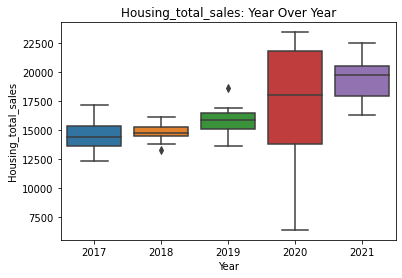

In [108]:
ax = sns.boxplot(x="Year", y="Housing_total_sales", data= Boxplot_data).set_title("Housing_total_sales: Year Over Year")

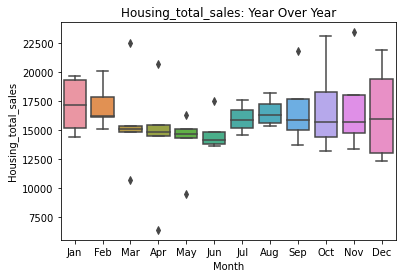

In [110]:
ax = sns.boxplot(x="Month", y="Housing_total_sales", data= Boxplot_data).set_title("Housing_total_sales: Year Over Year")

# Boxplot ISE

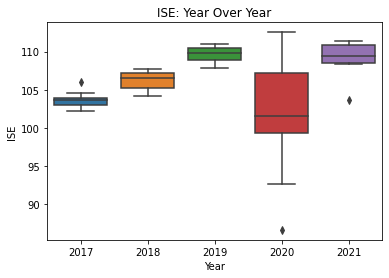

In [111]:
ax = sns.boxplot(x="Year", y="ISE", data= Boxplot_data).set_title("ISE: Year Over Year")

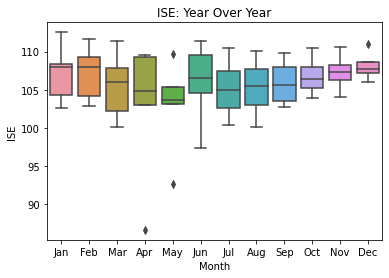

In [114]:
ax = sns.boxplot(x="Month", y="ISE", data= Boxplot_data).set_title("ISE: Year Over Year")

# Boxplot Housing_total_sales_SI

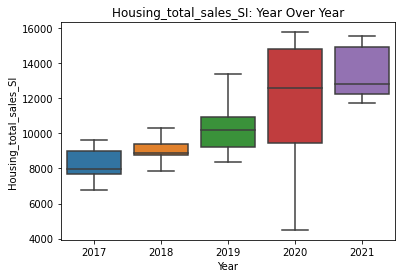

In [119]:
ax = sns.boxplot(x="Year", y="Housing_total_sales_SI", data= Boxplot_data).set_title("Housing_total_sales_SI: Year Over Year")


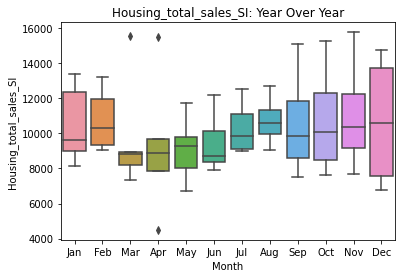

In [120]:
ax = sns.boxplot(x="Month", y="Housing_total_sales_SI", data= Boxplot_data).set_title("Housing_total_sales_SI: Year Over Year")

# Boxplot working_day

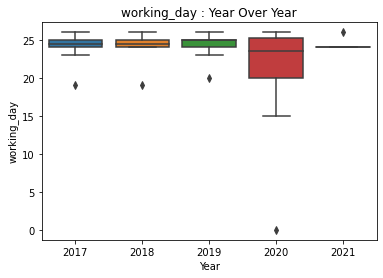

In [122]:
ax = sns.boxplot(x="Year", y="working_day", data= Boxplot_data).set_title("Working_day : Year Over Year")

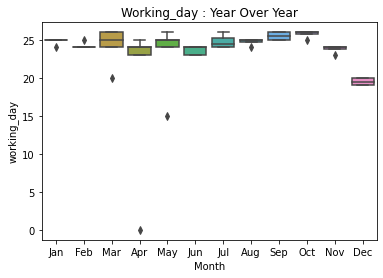

In [125]:
ax = sns.boxplot(x="Month", y="working_day", data= Boxplot_data).set_title("Working_day : Year Over Year")

# Boxplot Consumer_microcredit

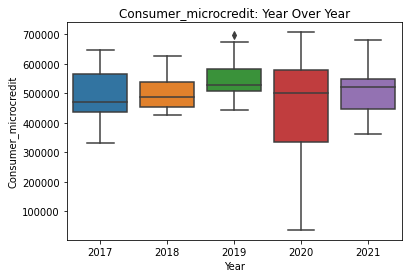

In [128]:
ax = sns.boxplot(x="Year", y="Consumer_microcredit", data= Boxplot_data).set_title("Consumer_microcredit: Year Over Year")

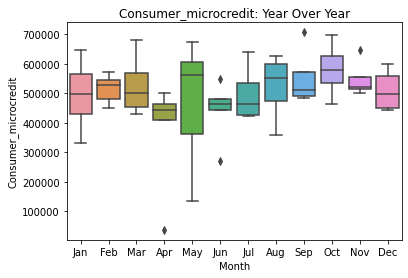

In [129]:
ax = sns.boxplot(x="Month", y="Consumer_microcredit", data= Boxplot_data).set_title("Consumer_microcredit: Year Over Year")

# Boxplot Gray_cement_dispatch_contractor

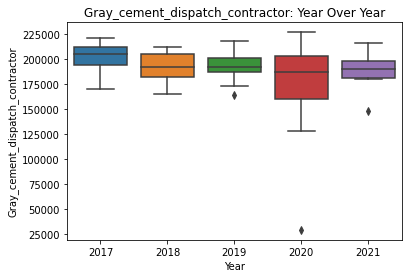

In [130]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_contractor", data= Boxplot_data).set_title("Gray_cement_dispatch_contractor: Year Over Year")

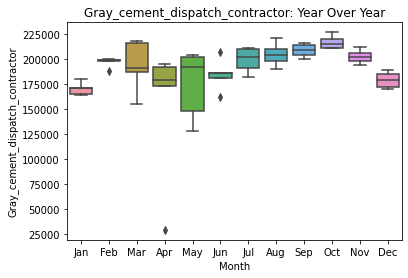

In [134]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_contractor", data= Boxplot_data).set_title("Gray_cement_dispatch_contractor: Year Over Year")


# Clustered Plots

NameError: ignored

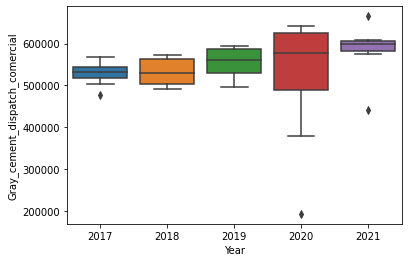

In [141]:
sns.boxplot(x="Year", y="Gray_cement_dispatch_comercial", data= Boxplot_data).set_title("Porcelana Gray_cement_dispatch_comercial: Year Over Year",ax=axs[1])
sns.boxplot(x="Year", y="Gray_cement_dispatch_other", data= Boxplot_data).set_title("Gray_cement_dispatch_other: Year Over Year",ax=axs[2])

In [48]:
# First get the correlations
corr = total.corr()['Quantity'].sort_values(ascending=False)
print(corr[corr >= 0.4])
print(corr[corr <= -0.3])

Quantity                               1.000000
Gray_cement_dispatch_comercial         0.763691
Gray_cement_dispatch_other             0.749478
Gray_cement_dispatch                   0.742108
Gray_cement_prod                       0.711097
Housing_total_sales                    0.706916
ISE                                    0.687654
Housing_total_sales_SI                 0.641345
working_day                            0.637156
Consumer_microcredit                   0.617899
Gray_cement_dispatch_contractor        0.614080
GDP_Total                              0.586808
Gray_cement_dispatch_Factory           0.574781
Seasonal                               0.570067
Consumer_credit                        0.569966
Housing_total_sales_NO_SI              0.559692
Credit_card                            0.521891
Gray_cement_dispatch_comerciallag_1    0.512897
Housing_loan                           0.482352
Housing_total_saleslag_1               0.477736
Unemployment%lag_6                     0

In [49]:
Quantity = total["Quantity"]

In [ ]:
Quantity

In [12]:
sns.boxplot(x=)

SyntaxError: ignored

# Scatterplots

In [22]:
total['x1'] = total.index

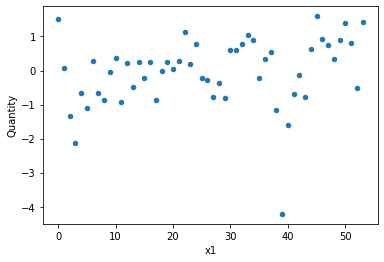

In [23]:
total.plot(kind = 'scatter', x = 'x1', y= 'Quantity')

In [24]:
total.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,x1
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,0
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,1
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,1,

total.head

```
# This is formatted as code
```



In [21]:
sns.scatterplot(data = total, x= index, y = Quantity)

NameError: ignored

## Just for the heck of it let us run quatity against each of the seperate csv files.

Figure out how many features sanswer to a call for Features.

how toa call all rows of each data set.

Then combine quantity with them into creatingt anew dataset.
Astart by getting a list of features in the smallest data set.






# Subset all of the features from the Credits CSV

0   Consumer_credit       187 non-null    float64
 1   Consumer_microcredit  187 non-null    float64
 2   Ordinary_credit       187 non-null    float64
 3   Preferencial_credit   187 non-null    float64
 4   loan_overdrafts       187 non-null    float64
 5   Credit_card           187 non-null    float64
 6   Treasury_loan         187 non-null    float64
 7   Housing_loan 

In [ ]:
# list(data) or
#list(data.columns)
#list(Porc_Op.columns)
Porc_Op.columns.sort_values().values

0   Consumer_credit       187 non-null    float64

 1   Consumer_microcredit  187 non-null    float64

 2   Ordinary_credit       187 non-null    float64

 3   Preferencial_credit   187 non-null    float64

 4   loan_overdrafts       187 non-null    float64

 5   Credit_card           187 non-null    float64
 
 6   Treasury_loan         187 non-null    float64
 7   Housing_loan 

## Now subset Quantity and the Credit Features

In [ ]:
credit_subset =Porc_Op[['Quantity','Consumer_credit','Consumer_microcredit', 'Ordinary_credit',
                         'Preferencial_credit','loan_overdrafts','Credit_card', 'Treasury_loan',
                         'Housing_loan']]

In [ ]:
credit_subset.head()

,Quantity,Consumer_credit,Consumer_microcredit,Ordinary_credit,Preferencial_credit,loan_overdrafts,Credit_card,Treasury_loan,Housing_loan
0,1.50354806,3092166.06600000,331812.34760000,4498496.51000000,3728949.88600000,5515276.14600000,3370234.66200000,225521.44280000,907715.11620000
1,0.07621345,4515186.34200000,451305.41870000,7087850.70500000,4505899.23100000,6331676.21500000,3469317.75500000,349373.56400000,1609027.08800000
2,-1.34625839,6326616.52600000,570278.72590000,7736718.49900000,5031263.81700000,8189116.43600000,4411360.21400000,486325.04950000,2087282.77200000
3,-2.12258463,4430585.24600000,409366.71890000,5385395.73200000,5234432.38700000,6684153.42700000,3659685.47800000,342484.08530000,1444558.71300000
4,-0.66506696,5719670.03600000,562752.43390000,6889420.85400000,7229993.26300000,8822385.04100000,4814904.23200000,588531.85810000,1858230.81800000


In [ ]:
credit_subset.tail()

,Quantity,Consumer_credit,Consumer_microcredit,Ordinary_credit,Preferencial_credit,loan_overdrafts,Credit_card,Treasury_loan,Housing_loan
49,0.90313362,7751130.52995000,544938.78226000,6036372.11506000,6203555.17403000,4074946.30520000,5455173.83439000,465642.51314000,2470696.69261000
50,1.40754630,9388275.86179000,680953.07190000,6192130.50984000,7739868.44043000,4969331.14354000,6825748.67384000,744899.78519000,2534968.69209000
51,0.79841006,8129448.34989000,501240.18192000,5784924.39931000,6729714.52454000,4087633.14495000,5271367.53313000,660828.32190000,2315315.88528000
52,-0.50289396,6333574.49347000,362509.13949000,5056129.25555000,7401186.19605000,4188024.32403000,5439582.48854000,548910.34558000,1989436.79243000
53,1.41610737,9191651.08896000,548634.36762000,6861119.52819000,8936970.38716000,4797926.25759000,7896086.74324000,672284.37876000,2923877.97589000


# Next run a correlation of Quantity v Credit Features

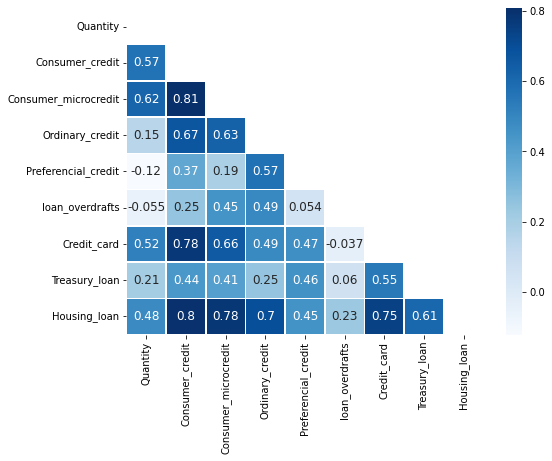

In [ ]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(credit_subset.corr(), dtype=np.bool))
sns.heatmap(data = credit_subset.corr(), annot= True, linewidths=.5, cmap='Blues', mask=mask,  annot_kws={"fontsize":12})

# Next , for practice try running a regression on credit subset

In [ ]:
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score

# MultiLinear Regression

## imprt data

In [ ]:
# !pip install scikit-learn

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn import metrics

In [ ]:
#credit_subset
list(credit_subset)

['Quantity',
 'Consumer_credit',
 'Consumer_microcredit',
 'Ordinary_credit',
 'Preferencial_credit',
 'loan_overdrafts',
 'Credit_card',
 'Treasury_loan',
 'Housing_loan']

# Data Split

In [ ]:
#Break data in training and testing

# select all of the cols except the targe one, Sales

#feature_cols = ['TV','radio', 'newspaper']

#X = Adv[feature_cols] # Features

feature_cols = ['Consumer_credit','Consumer_microcredit','Ordinary_credit',
                'Preferencial_credit','loan_overdrafts','Credit_card',
                'Treasury_loan','Housing_loan']

X = credit_subset [feature_cols] # <<<--- couldnt we use the name of
                                  # the entire dataset instead?

X

In [ ]:
# Now select the Y , the dependent, the QUNATITY one via iloc location method
#y = Adv.label

y = credit_subset.iloc[:,0] # Target variable
                            # So Qty is the INDEX???   ???
y

Now we ahve the independent, the X featureas abd the Y , dependent features, now weirdly , we feed python 2 dataframes simultaneoulsy, X & y and tell it to place 80% of x in one bin , 20% in test bin, place 80% of y in one bin.....

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
y_test

In [ ]:
LinearReg = LinearRegression()  
LinearReg.fit(X_train, y_train)

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: -0.3915875562565011
Coefficients: [ 1.41753457e-07  5.60812329e-06 -7.42505232e-08 -2.27319358e-07
 -2.14039600e-07 -6.20844390e-09  2.20838675e-07 -1.10529457e-07]


In [ ]:
#pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logreg.coef_[0]})

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients": LinearReg.coef_[0]})

,Feature,Coefficients
0,Consumer_credit,1.417535e-07
1,Consumer_microcredit,1.417535e-07
2,Ordinary_credit,1.417535e-07
3,Preferencial_credit,1.417535e-07
4,loan_overdrafts,1.417535e-07
5,Credit_card,1.417535e-07
6,Treasury_loan,1.417535e-07
7,Housing_loan,1.417535e-07


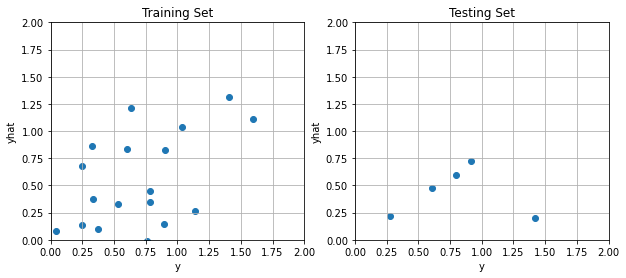

In [ ]:
#Two plots togheter
#
#The testing set below does not look represenative of training set.

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,2)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')


ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,2)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

In [ ]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.6544835540106216
Mean Absolute Error: 0.4406117904837232
Mean Squared Error: 0.3578138963694897
Root Mean Squared Error: 0.5981754728919347

Testing Metrics:
R squared: 0.31924053030653665
Mean Absolute Error: 0.5742700277840553
Mean Squared Error: 0.5717878034050782
Root Mean Squared Error: 0.7561665183047172


## Auto feature selection

#To use the most recent version
pip install autoviml --upgrade --ignore-installed

xgboost

[link text](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

Jason: [link text](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)



In [ ]:
#####

# Her eai try to select a single value, Qty at Dec 2020 and then runa  regression agains teh entire data frame using that value

### first find islaote Qty Dec 2020

# Basement Junk